### Student Performance Indicator

#### Life Cycle of this Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1. Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2. Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 2.1 Importing Pandas, numpy, matplotlib, seaborn, warnings libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv('data/stud.csv')

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape
data.shape

(1000, 8)

### 2.2 Dataset info

* __gender__ : sex of students -> (Male/female)
* __race/ethnicity__ : ethnicity of students -> (Group A, B,C, D,E)
* __parental level of education__ : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* __lunch__ : having lunch before test (standard or free/reduced)
* __test preparation course__ : complete or not complete before test
* __math score__
* __reading score__
* __writing score__

### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [5]:
# Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Checking null values
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# Statistics
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# Check dublicates
data.duplicated().sum()

0

In [9]:
# Check the unique values in each feature
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Insight

* From the above data there are no missing values
* There are 3 numerical features 
* mean is very close of these numerical features between 66.054 to 69.169
* std is also very close from 14.6 to 15.16
* min score of each is different with math being 0, writing 10 were as reading score is 17


In [10]:
# Exploring Data
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print(f"Catagories in gender \n{data['gender'].unique()}\n")
print(f"Catagories in race_ethnicity \n{sorted(data['race_ethnicity'].unique())}\n")
print(f"Catagories in parental_level_of_education \n{sorted(data['parental_level_of_education'].unique())}\n")
print(f"Catagories in lunch \n{data['lunch'].unique()}\n")
print(f"Catagories in test_preparation_course \n{data['test_preparation_course'].unique()}\n")

Catagories in gender 
['female' 'male']

Catagories in race_ethnicity 
['group A', 'group B', 'group C', 'group D', 'group E']

Catagories in parental_level_of_education 
["associate's degree", "bachelor's degree", 'high school', "master's degree", 'some college', 'some high school']

Catagories in lunch 
['standard' 'free/reduced']

Catagories in test_preparation_course 
['none' 'completed']



In [13]:
# Numerical and Categorical features

numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
data.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


### Adding columns for "Total Score" and "Average"

In [16]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score']/3

In [17]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['average'].count()
math_less_20 = data[data['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


__Insights__
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

### 4. Exploring Data ( Visualization )

#### Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

#### Histogram & KDE3

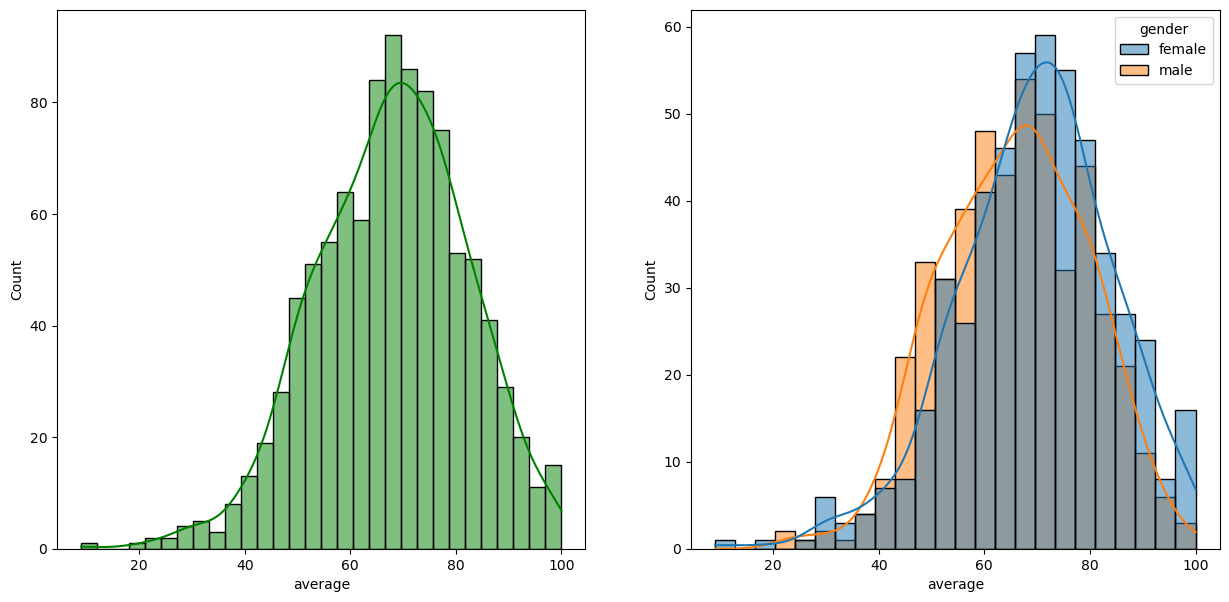

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='average',kde=True,hue='gender')
plt.show()

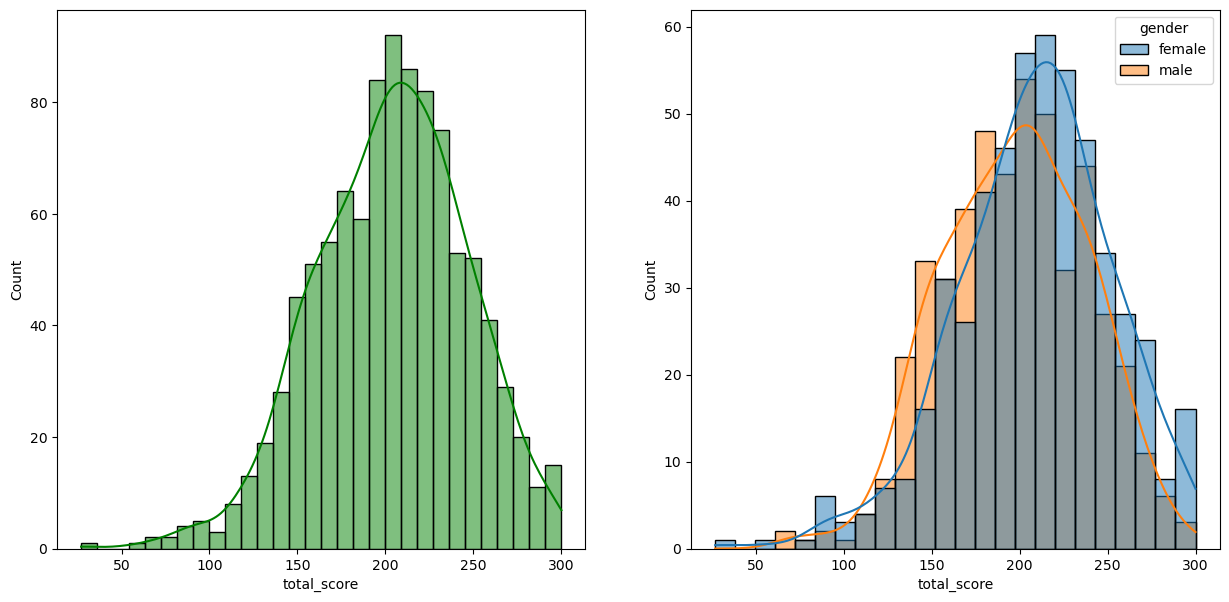

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

__Insights__

* Female students tend to perform morethan that of male

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.title("Average score vs parental_level_of_education")

plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Data with gender as Male vs parental_level_of_education")

plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.title("Data with gender as female vs parental_level_of_education")

plt.show()

: 

__Insights__
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

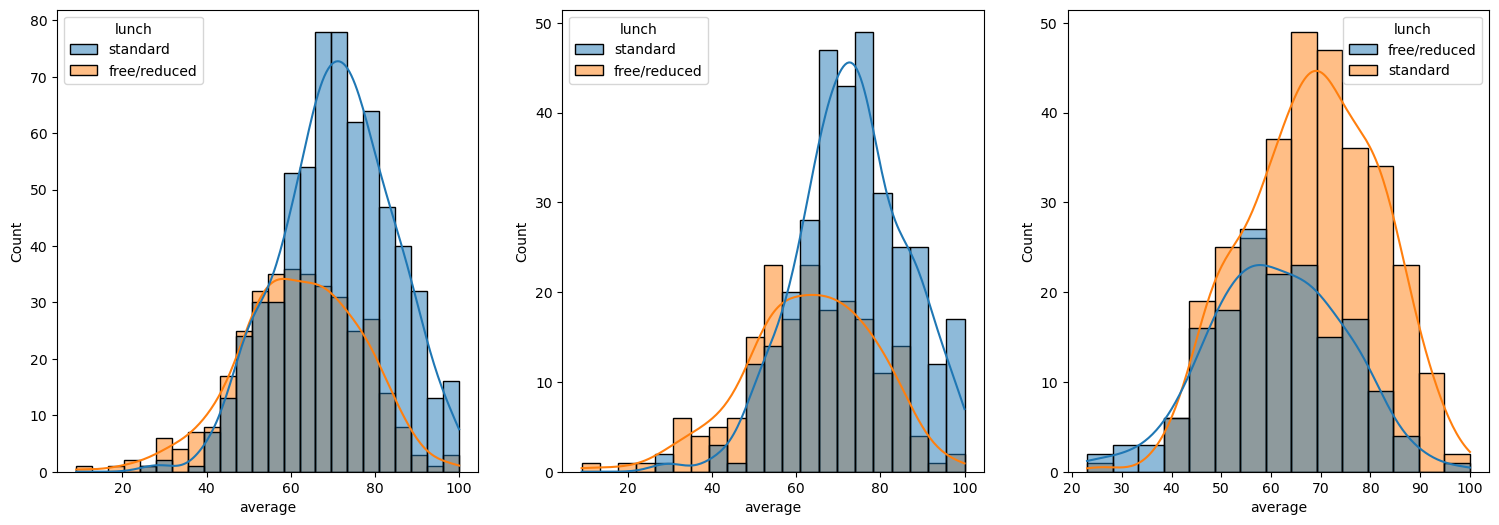

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

__Insight__

* From all the figures in general standard lunch helps student's perform well in exams

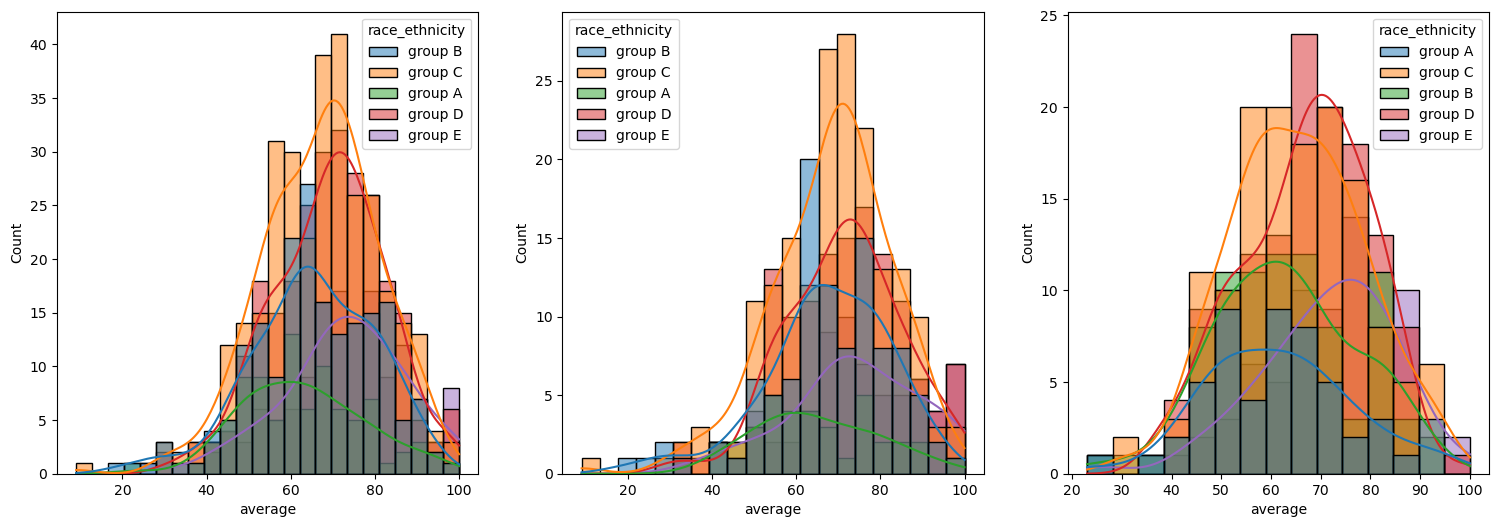

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

__Insight__
* Overall students of group A, E perform poorly in exam
* Regardless of gender students of group A, E poorly performed

### Maximum score of students in all the three subjects

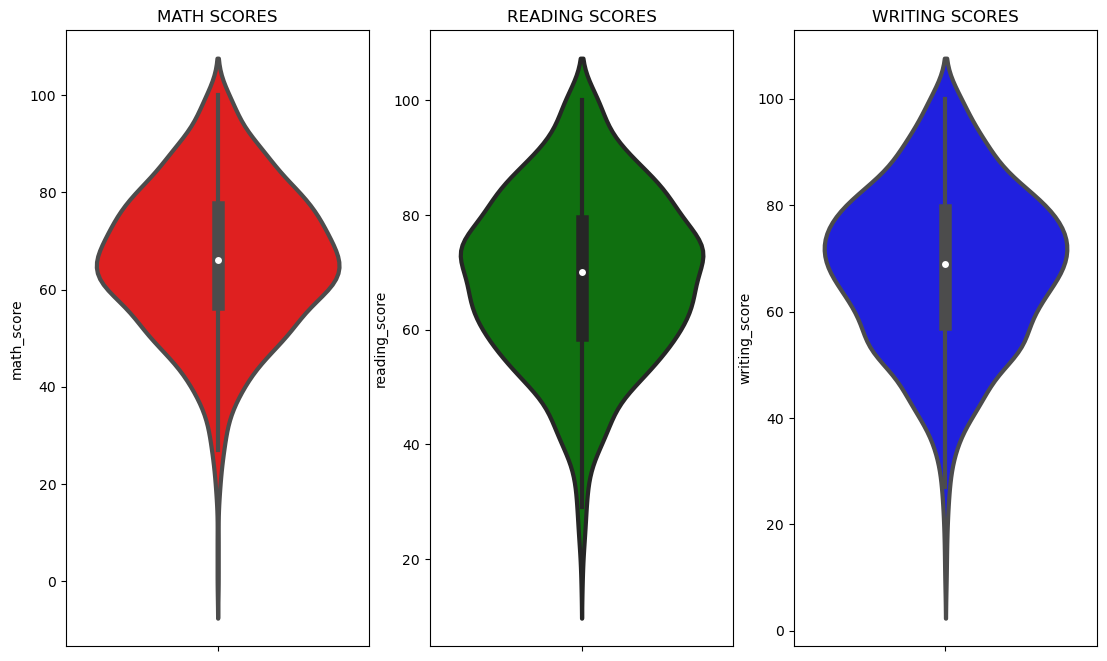

In [36]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

__Insight__

* Most of the students scored just lessthan 60 to 80 in math, just above 50 to just above 80 in reading and around 60 - 80 in writing

### Multivariate analysis using Pie Plot

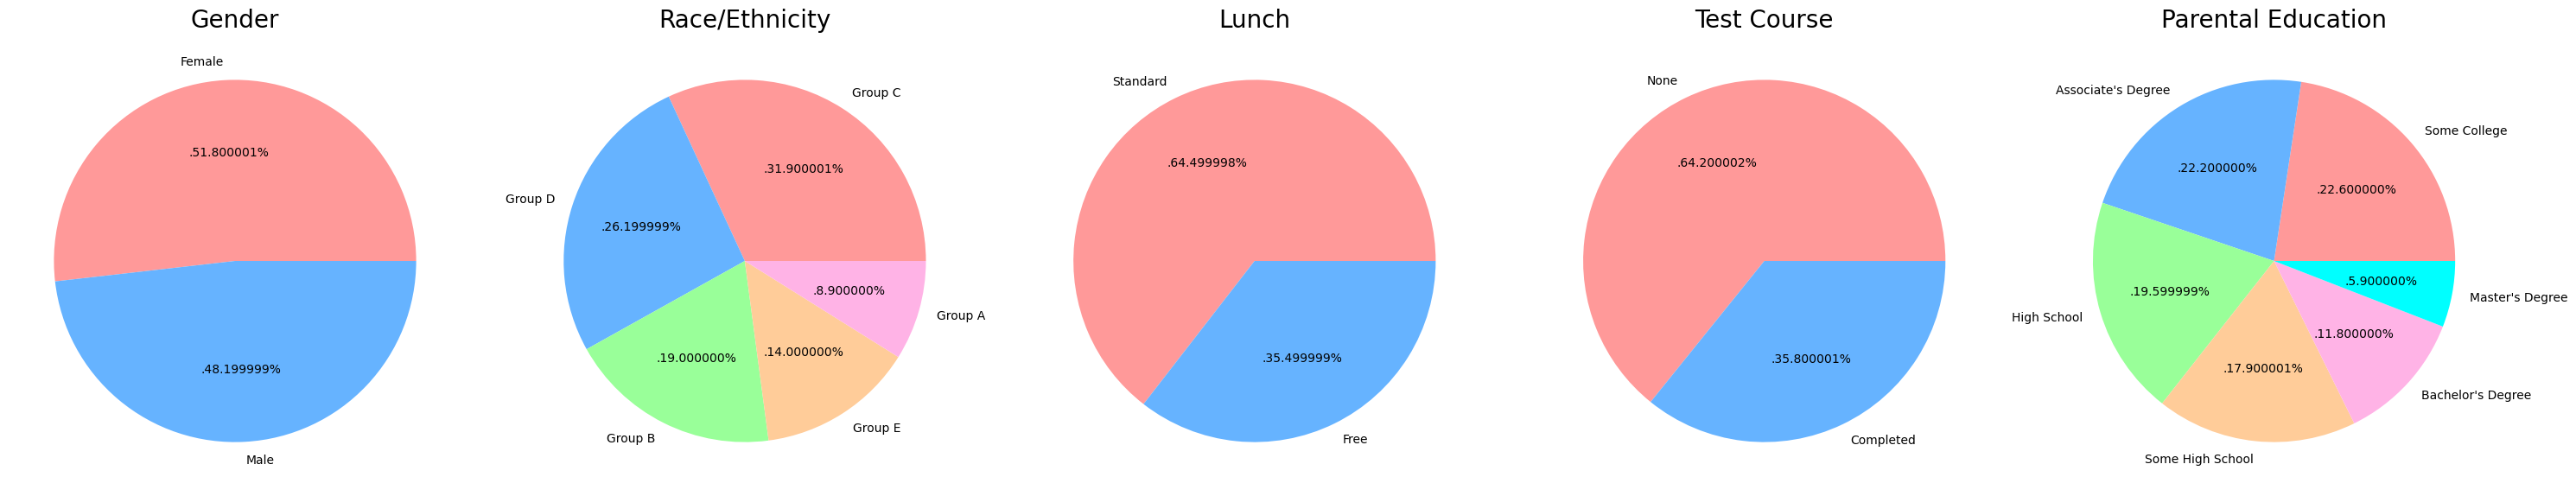

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

 """Gender"""
plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6', 'cyan','orange','grey']

plt.pie(size,  colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

 """Race/Ethnicity"""
plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
# color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

  """Lunch"""
plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
# color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

 """Test Course"""
plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
# color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

 """parental Education"""
plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
# color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

__Insights__

* Number of males and females are nearly equaly
* Number of students in Group C are greaterthan others
* Students having standard lunch is greaterthan that of Free
* There are far less students who completed the courses they enrolled
* There are more parents who have either Associate degree or some college degree

### Featurewise Visualization

#### Gender Column

- What is the distribution of the gender column?
- Is gender has any impact on student's performance?

#### Univarient Analysis (How is the distribution of Gender?)

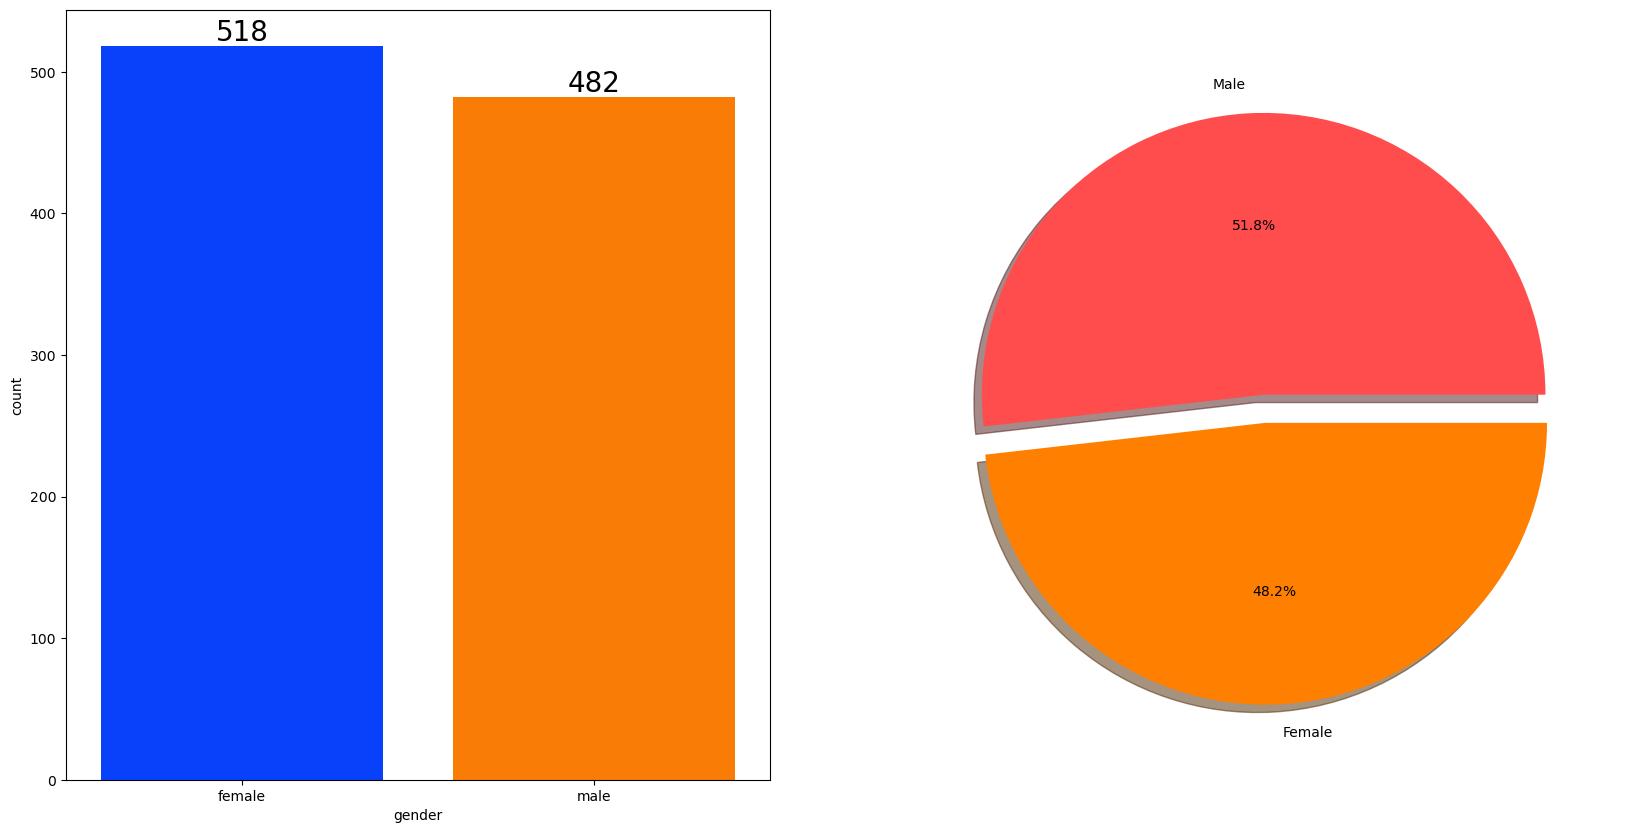

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=data['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

__Insights__
- Males and Females are nearly equally distributed

#### Bivarient Analysis (Is gender has any impact on student's performance ?)

In [53]:
gender_group = data.groupby(['gender']).mean()

In [54]:
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


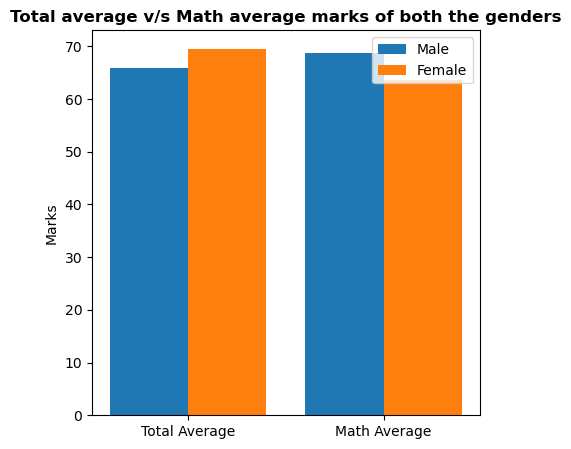

In [58]:
plt.figure(figsize=(5,5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

__Insights__

- In math males performed litter betterthan that of females
- Overall females are performing better than males

**Race/ Etnicity Column**
- How is group wise distribution?
- Is Race/ Etnicity has any importance on student's performance?

#### Univarient Analysis (How is Group wise distribution ?) 

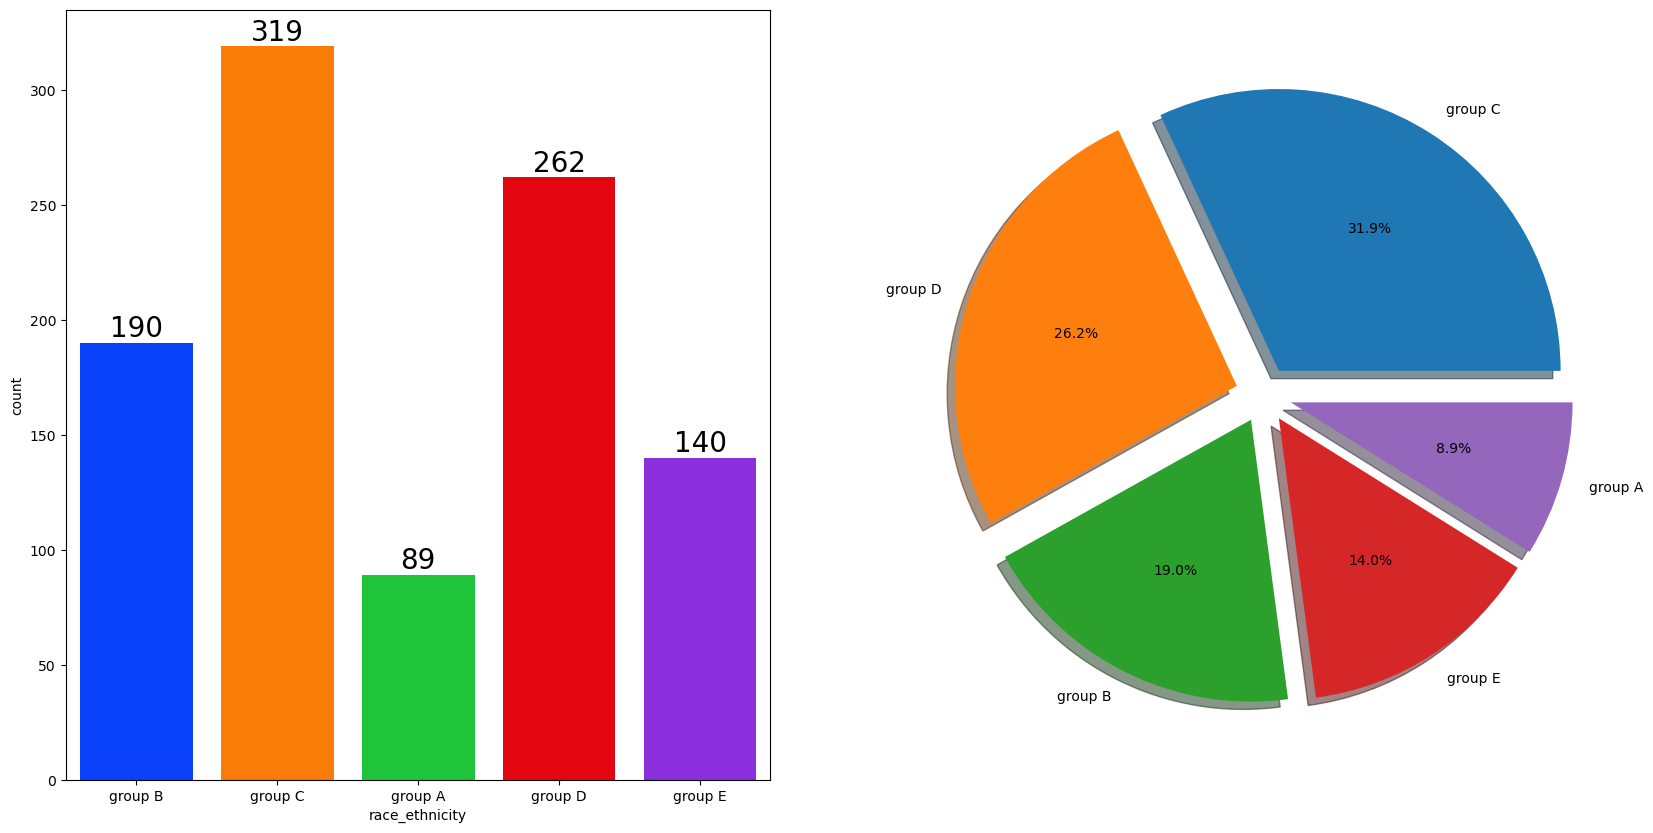

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'], data=data, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

__Insights__

- Most students belongs to group c 
- Around 58% of students belong to Group C and D together 
- Group A has the lowest number of students with only 8.9%

#### BiVarient Analysis (Is Race/ Etnicity has any importance on student's performance?)

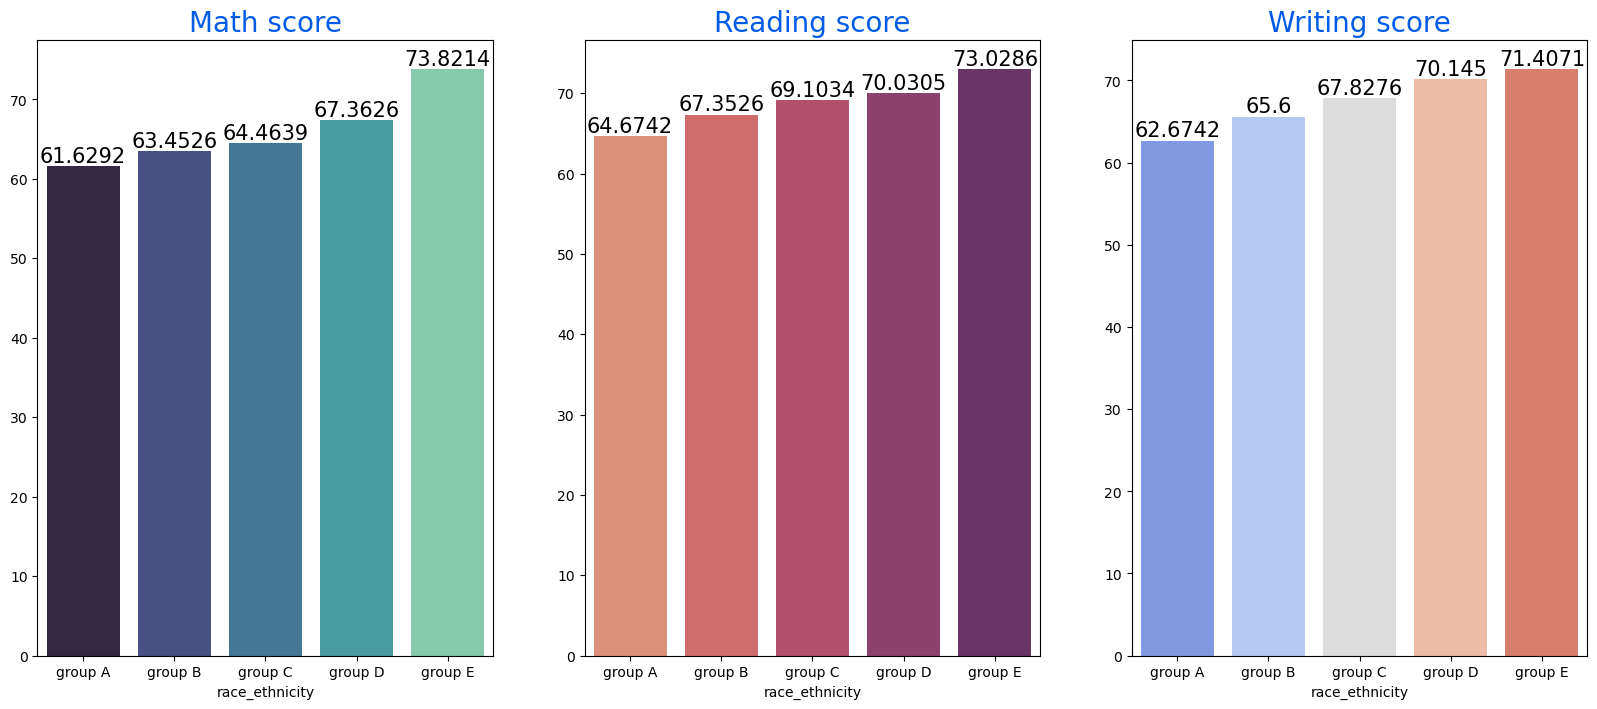

In [65]:
Group_data2=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

__Insights__

- Group E has the highest scores where as A has the least
- Scores are in the increasing order of A-E
- Student's from the lower socio economic status have the lower average scores in all the subjects

#### Parental Level of the Education Column
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### Univarient Analysis (What is educational background of student's parent ?)

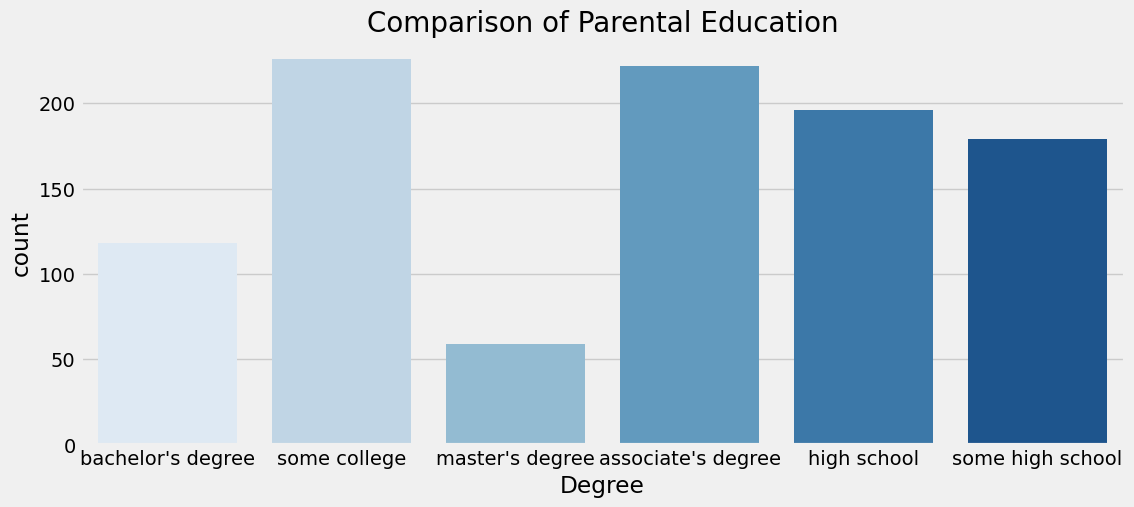

In [71]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.style.use('fivethirtyeight')
sns.countplot(data['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

__Insights__

- There are most parents who have some degree or Associate's degree
- Fewer parents have the Masters degree 

#### BiVarient Analysis (Is parental education has any impact on student's performance ?)

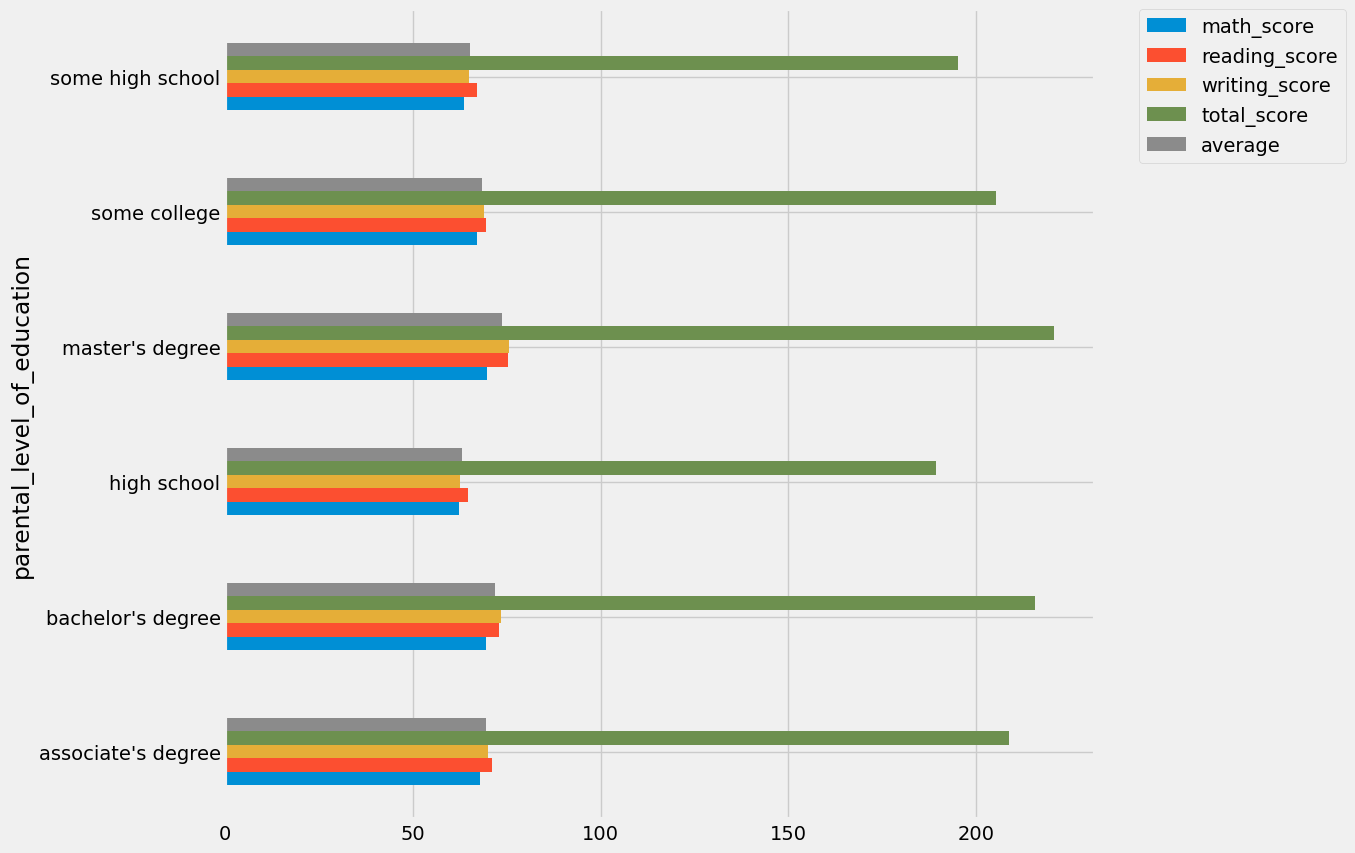

In [74]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

__Insights__
- The score of student whose parents possess master and bachelor level education are higher than others.

#### Lunch Column
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### Univarient Analysis (Which type of lunch is most common amoung students ?)

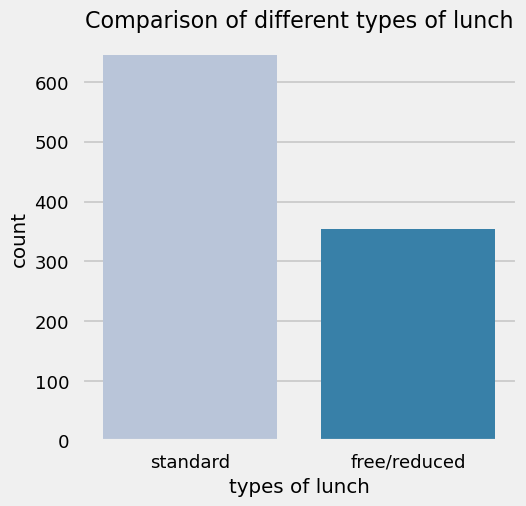

In [82]:
plt.rcParams['figure.figsize'] = (5,5)
# plt.style.use('seaborn-talk')
sns.countplot(data['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 20, fontsize = 16)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

__Insights__

- Students are being served more of standard lunch

#### BiVarient Analysis (What is the effect of lunch type on test results?)

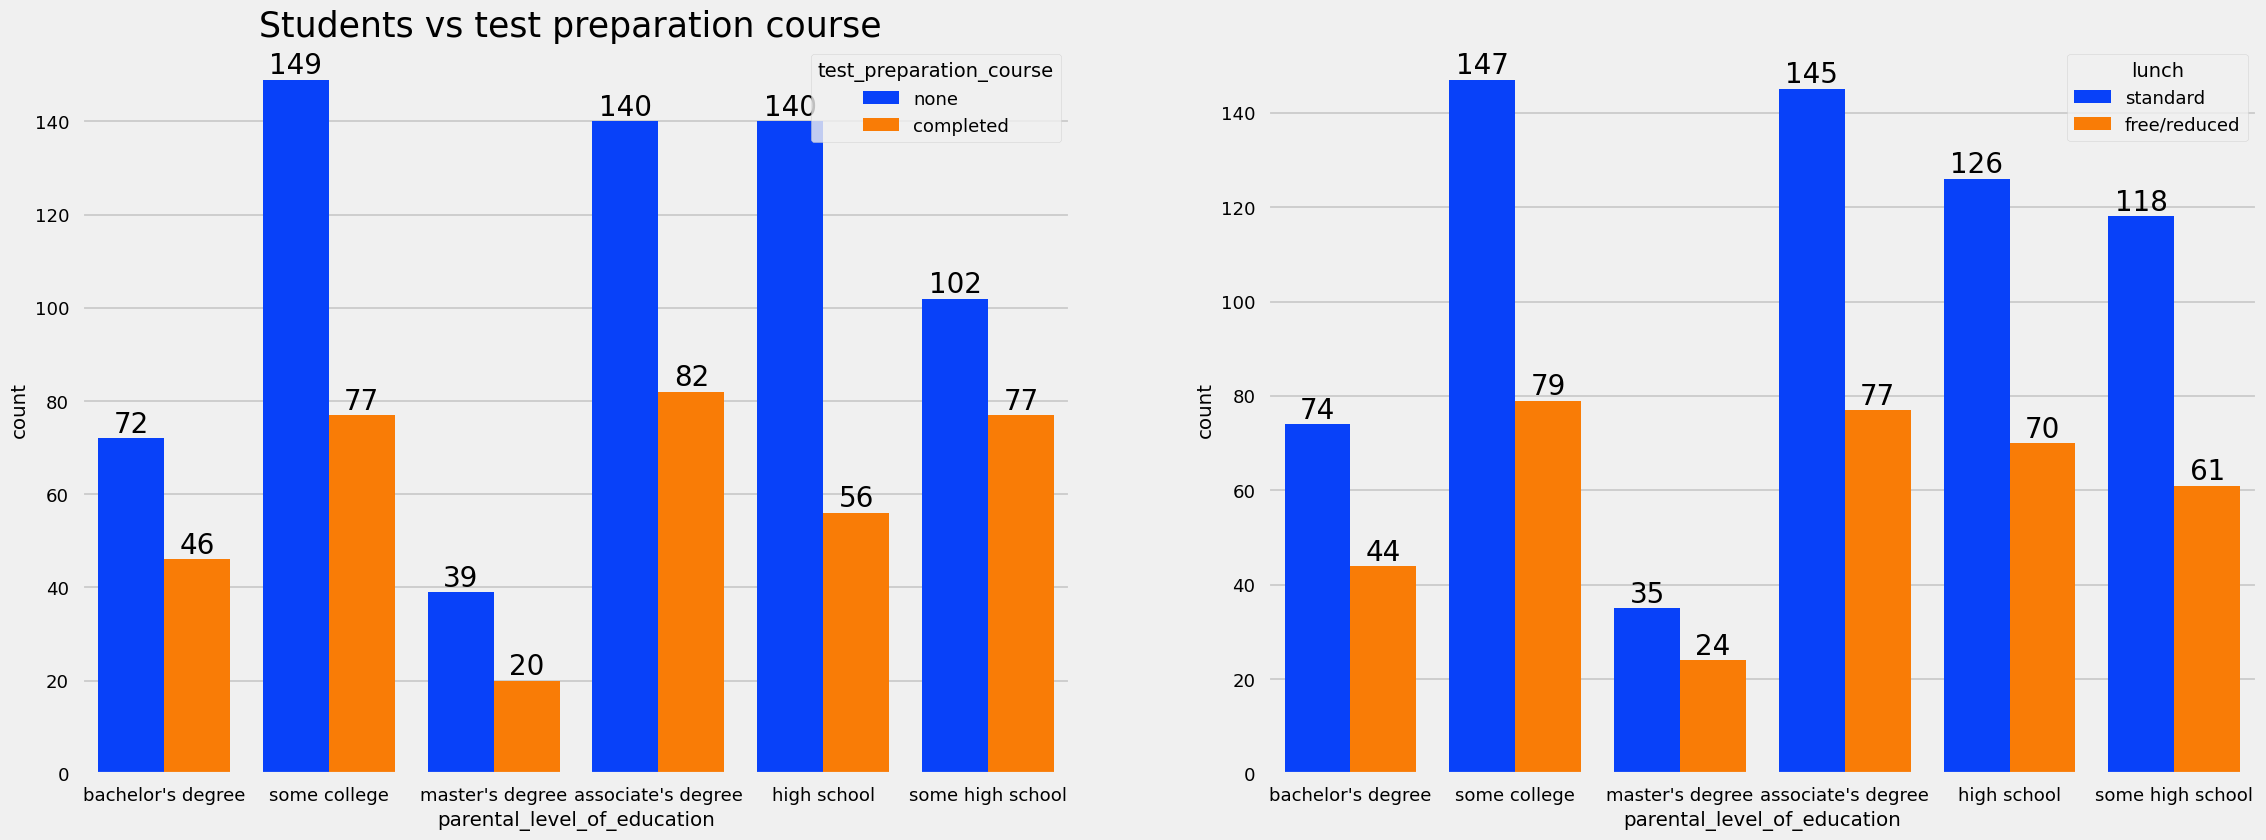

In [86]:
f,ax=plt.subplots(1,2,figsize=(25,9))
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=data['parental_level_of_education'],data=data,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

In [ ]:
# __Insights__

# - There are more people who didn't completed the degree that they started

#### Checking Outliers

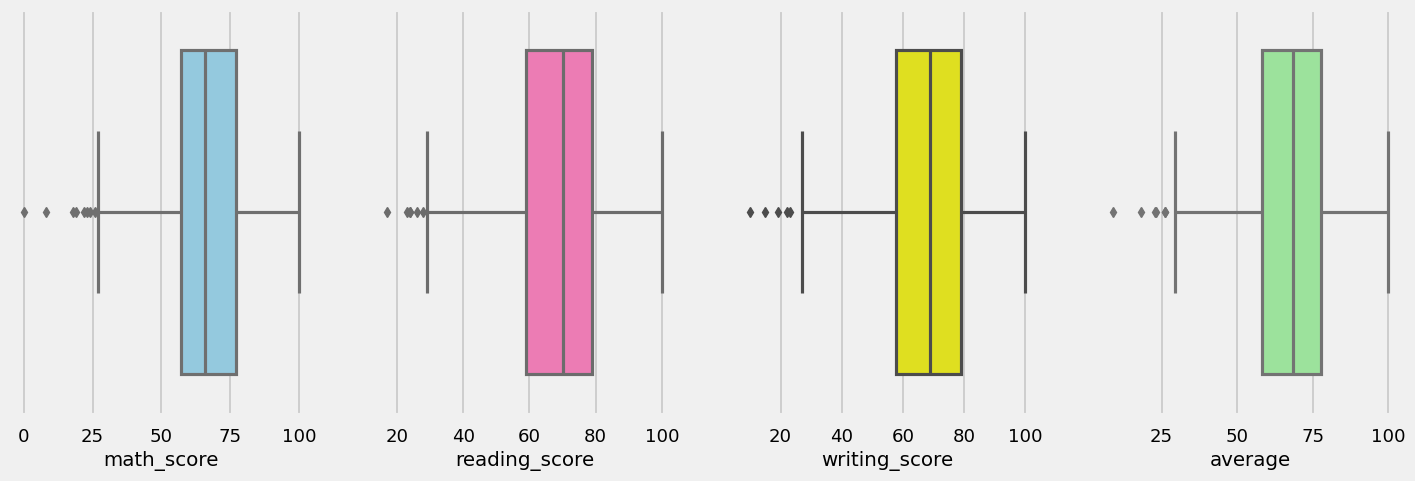

In [89]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

#### Multivarient Analysis Using Pair plot 

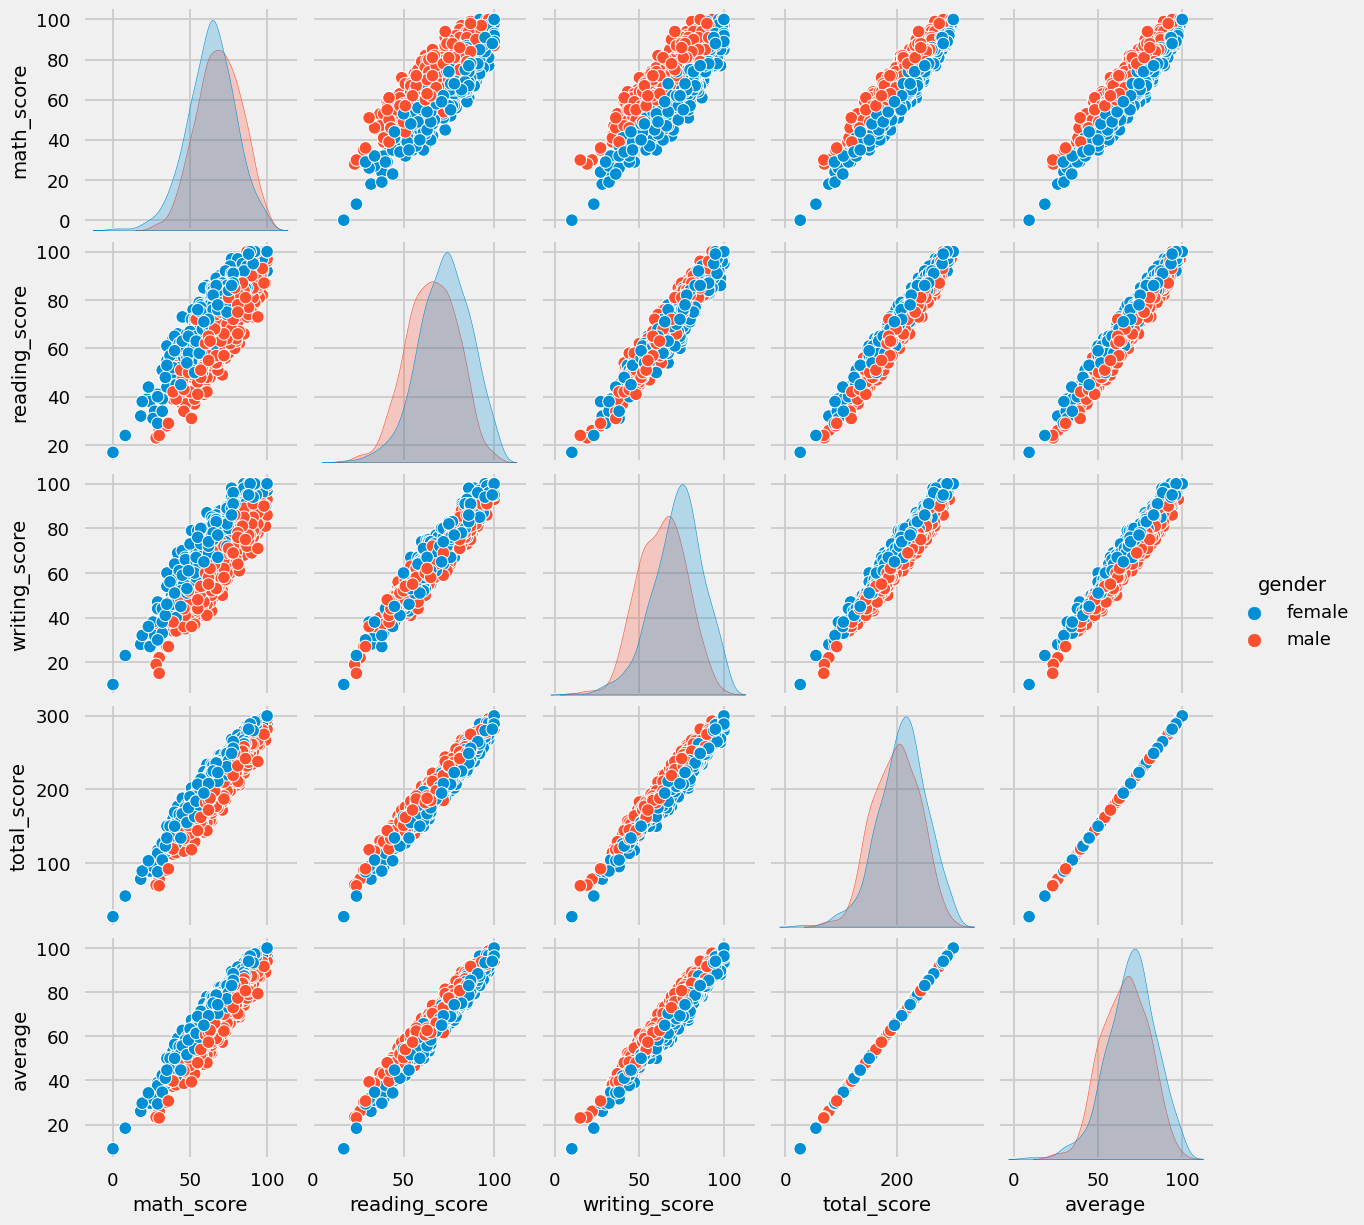

In [91]:
sns.pairplot(data,hue = 'gender')
plt.show()

__Insights__

- All the scores are linearly increasing 


#### Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.